## Capital Budget
### Data of Oct 16 2022
### Objectives
#### Look at the list of capital projects and match to an address and determine the distribution of these projects from an equity perspective based on census blocks tracts: https://apps.boston.gov/capital-projects/ and https://data.boston.gov/dataset/capital-budget/resource/c62d666e-27ea-4c03-9cb1-d3a81a1fb641

### Data sets used:
#### Capital Budget:
##### This data set is the FY23-27 Boston Capital plan. It is the City’s plan to make critical investments in the City’s infrastructure like, schools, roads, bridges, bike lanes, libraries, and more. This year’s $3.6B plan includes new infrastructure funds supporting affordable housing, revitalized parks, multi-modal transportation improvements, school improvements across the city.
#### Operating Budget:
##### The FY23 Adopted Operating Budget totals $3.99 billion and represents an increase of $223 million or 5.9% over FY22. The adopted version reflects the final budget version adopted by the City Council on June 29, 2022 and approved by the Mayor. The City's budget is planned and built on the program level for each department. This dataset contains expense categories of appropriations to each department and program from the City's General Fund for the year starting July 1, 2022 and ending June 30, 2023.

For more information on the City of Boston Budget please see the interactive web application at budget.boston.gov. For more detail on key terms, please see the Glossary of Terms here: https://www.boston.gov/departments/budget/glossary-terms.

#### Revenue Budget:
##### The FY23 Adopted Budget is supported by $3.99 billion in total revenue, an increase of $223 million, or 5.9%, from budgeted FY22 total revenue. The FY23 adopted budget includes $3.91 billion in recurring revenue and $80.0 million in non-recurring revenue. The City’s recurring revenue budget can be divided into three categories: Property Tax (75% of total recurring revenue), State Aid (13%) and Other Local Receipts (including excise taxes, fines, etc.; 12%).

For more information on the City of Boston Budget please see the interactive web application at budget.boston.gov. For more detail on key terms, please see the Glossary of Terms here: https://www.boston.gov/departments/budget/glossary-terms

# Capital Budget Analysis

In [392]:
#read capital-budget.csv with pandas
import pandas as pd
# 'utf-8' codec can't decode byte 0xe7 in position 18: invalid continuation byte, thus "ISO-8859-1"
df = pd.read_csv('capital-budget.csv', encoding = "ISO-8859-1")
# convert all columns after the 6th column to number, for example 400,000 to 400000, - to 0
for i in range(6, len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',', '').str.replace('-', '0').astype(int)
# drop na
df = df.dropna()

df.head()

C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\2151304769.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = df.iloc[:,i].str.replace(',', '').str.replace('-', '0').astype(int)


,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Public Library,Research Collections Preservation and Storage ...,"A planning study for the storage, preservation...",Boston Public Library,Study Underway,Citywide,200000,0,0,0,...,0,0,160000,40000,0,0,0,0,0,200000
1,Boston Centers for Youth and Families,BCYF Clougherty Pool,"Make upgrades to the pool, pool deck, the bath...",Public Facilities Department,To Be Scheduled,Charlestown,400000,0,2300000,0,...,1936,0,250000,2448064,0,0,0,0,0,2700000
2,Boston Public Schools,Window Repair and Replacement,Replace or make significant repairs to windows...,Boston Public Schools,Complete,Citywide,5111005,0,2111005,0,...,0,0,500000,6722010,0,0,0,0,0,7222010
3,Boston Centers for Youth and Families,Youth Budget Round 9,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,1000000,0,0,0,...,0,0,0,1000000,0,0,0,0,0,1000000
4,Boston Centers for Youth and Families,Youth Budget Round 8,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,1000000,0,0,0,...,0,0,0,1000000,0,0,0,0,0,1000000


In [399]:
# add a new column to store the total amount of each row
df['total'] = df.iloc[:,6:].sum(axis=1)
# sort by total
df = df.sort_values(by='total', ascending=False)
# reset index
df = df.reset_index(drop=True)
# make a new df with Department and Total
df2 = df[['Department', 'total']]
# group by Department and sum
df2 = df2.groupby('Department').sum()
# sort by total
df2 = df2.sort_values(by='total', ascending=False)
# reset index
df2 = df2.reset_index()
# print the sum of total
print('The total amount of capital budget is: ', df2['total'].sum())
# add a new column to store the percentage of each row
df2['percentage'] = df2['total']/df2['total'].sum()
df2

The total amount of capital budget is:  30260408547


,Department,total,percentage
0,Public Works Department,7756295199,0.256318
1,Boston Public Schools,7146845586,0.236178
2,Property Management Department,3252130857,0.107471
3,Parks and Recreation Department,3004749057,0.099296
4,Transportation Department,1883590032,0.062246
5,Mayor's Office of Housing,1282500000,0.042382
6,Environment Department,1154474391,0.038151
7,Boston Public Library,976320000,0.032264
8,Fire Department,933789573,0.030858
9,Police Department,890460000,0.029427


Based on the table, most budget spent in Boston city goes to public works and public schools, and they take up to 50% of total budget

In [401]:
# create a new dataframe by neighborhood
df_budget_per_neighborhood = df[['Neighborhood', 'Total_Project_Budget']]
# sum up the total capital budget for each neighborhood
df_budget_per_neighborhood = df_budget_per_neighborhood.groupby('Neighborhood').sum(numeric_only=True)
# sort the dataframe by Total_Project_Budget in descending order
df_budget_per_neighborhood = df_budget_per_neighborhood.sort_values(by='Total_Project_Budget', ascending=False)
# print the sum of Total_Project_Budget
print('The total amount of capital budget is: ', df_budget_per_neighborhood['Total_Project_Budget'].sum())
# add a new column to store the percentage of each row
df_budget_per_neighborhood['percentage'] = df_budget_per_neighborhood['Total_Project_Budget']/df_budget_per_neighborhood['Total_Project_Budget'].sum()
df_budget_per_neighborhood

The total amount of capital budget is:  3518953468


,Total_Project_Budget,percentage
Neighborhood,,
Citywide,680174651,0.193289
Charlestown,479502390,0.136263
Various neighborhoods,341588600,0.097071
Fenway/Kenmore,239348258,0.068017
Chinatown,238872172,0.067882
Government Center/Faneuil Hall,209323273,0.059485
South Boston,197815000,0.056214
Roxbury,158723299,0.045105
Dorchester,139578681,0.039665


In [395]:
# create a Boston html map and put all hte df_budget_per_neighborhood as popups
import folium
import requests
from bs4 import BeautifulSoup

# create a map of Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
neighborhoods = ['Citywide', 'Charlestown', 'Various neighborhoods', 'Fenway/Kenmore',
       'Chinatown', 'Government Center/Faneuil Hall', 'South Boston',
       'Roxbury', 'Dorchester', 'South End', 'Harbor Islands',
       'Financial District/Downtown', 'East Boston', 'Jamaica Plain',
       'Back Bay', 'Mattapan', 'Allston/Brighton', 'West Roxbury',
       'Beacon Hill', 'North End', 'Roslindale', 'Mission Hill', 'Hyde Park',
       'Various Neighborhoods', 'West End', 'Bay Village']
# latitudes and longitudes of the neighborhoods
latitudes = [42.3601, 42.3770, 42.3601, 42.3488, 42.3521, 42.3598, 42.3331, 42.3248, 42.3083, 42.3411, 42.3581, 42.3581, 42.3751, 42.3097, 42.3473, 42.2678, 42.3501, 42.2793, 42.3581, 42.3651, 42.2912, 42.3320, 42.2557, 42.3601, 42.3636, 42.3509]
longitudes = [-71.0589, -71.0603, -71.0589, -71.0945, -71.0620, -71.0545, -71.0495, -71.0955, -71.0603, -71.0772, -71.0517, -71.0517, -71.0393, -71.1200, -71.0757, -71.0928, -71.1557, -71.1496, -71.0603, -71.0545, -71.1245, -71.1053, -71.1245, -71.0589, -71.0636, -71.0662]

# find max and min values in the Total_Project_Budget column
max_value = df_budget_per_neighborhood['Total_Project_Budget'].max()
min_value = df_budget_per_neighborhood['Total_Project_Budget'].min()


# create a map of Boston with neighborhoods as markers popups with the total capital budget and fill the markers based on the total capital budget compared to the max and min values
for lat, lng, neighborhood, total_project_budget in zip(latitudes, longitudes, neighborhoods, df_budget_per_neighborhood['Total_Project_Budget']):
    label = folium.Popup(neighborhood + '\n' + str(total_project_budget), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=(total_project_budget-min_value)/(max_value-min_value),
        parse_html=False).add_to(boston_map)

# save the map as HTML file
boston_map.save('boston_map.html')




    

Based on community/neighborhood, most budget is going to the main city rather than suburbs, and Charlestown seems to be a high budget location considering it is not around downtown area. 

In [396]:
# create a new dataframe with columns as department and rows as neighborhoods, such that each cell contains the total capital budget for that department in that neighborhood
df_budget_per_department_per_neighborhood = df[['Neighborhood', 'Department', 'Total_Project_Budget']]
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.groupby(['Neighborhood', 'Department']).sum(numeric_only=True)
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.unstack(level=1)
# fill the NaN values with 0
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.fillna(0)
# add a new column 'Total' to the dataframe
df_budget_per_department_per_neighborhood['Total'] = df_budget_per_department_per_neighborhood.sum(axis=1)
# sort the dataframe by the 'Total' column in descending order
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.sort_values(by='Total', ascending=False)
df_budget_per_department_per_neighborhood

Total_Project_Budget  \
Department                     Boston Centers for Youth and Families   
Neighborhood                                                           
Citywide                                                   9250000.0   
Charlestown                                                2700000.0   
Various neighborhoods                                       200000.0   
Fenway/Kenmore                                                   0.0   
Chinatown                                                        0.0   
Government Center/Faneuil Hall                                   0.0   
South Boston                                              31150000.0   
Roxbury                                                          0.0   
Dorchester                                                 6500000.0   
South End                                                        0.0   
Harbor Islands                                                   0.0   
Financial District/Downtown                                      0.0   
East Boston                                                8975000.0   
Jamaica Plain                                                    0.0   
Back Bay                                                         0.0   
Mattapan                                                  13200000.0   
Allston/Brighton                                            125000.0   
West Roxbury                                                     0.0   
Beacon Hill                                                      0.0   
North End                                                  5000000.0   
Roslindale                                                 1000000.0   
Mission Hill                                               2050000.0   
Hyde Park                                                  3000000.0   
Various Neighborhoods                                            0.0   
West End                                                         0.0   
Bay Village                                                      0.0   

                                                                       \
Department                     Boston Planning and Development Agency   
Neighborhood                                                            
Citywide                                                          0.0   
Charlestown                                                 1000000.0   
Various neighborhoods                                             0.0   
Fenway/Kenmore                                                    0.0   
Chinatown                                                         0.0   
Government Center/Faneuil Hall                                    0.0   
South Boston                                                3650000.0   
Roxbury                                                           0.0   
Dorchester                                                        0.0   
South End                                                         0.0   
Harbor Islands                                                    0.0   
Financial District/Downtown                                       0.0   
East Boston                                                  450000.0   
Jamaica Plain                                                     0.0   
Back Bay                                                          0.0   
Mattapan                                                          0.0   
Allston/Brighton                                                  0.0   
West Roxbury                                                      0.0   
Beacon Hill                                                       0.0   
North End                                                         0.0   
Roslindale                                                        0.0   
Mission Hill                                                      0.0   
Hyde Park                                                         0.0   
Various Neighborhoods                                        

In [397]:
import folium

# create a map of Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
neighborhoods = ['Citywide', 'Charlestown', 'Various neighborhoods', 'Fenway/Kenmore',
         'Chinatown', 'Government Center/Faneuil Hall', 'South Boston',
            'Roxbury', 'Dorchester', 'South End', 'Harbor Islands',
            'Financial District/Downtown', 'East Boston', 'Jamaica Plain',
            'Back Bay', 'Mattapan', 'Allston/Brighton', 'West Roxbury',
            'Beacon Hill', 'North End', 'Roslindale', 'Mission Hill', 'Hyde Park',
            'Various Neighborhoods', 'West End', 'Bay Village']
# latitudes and longitudes of the neighborhoods
latitudes = [42.3601, 42.3770, 42.3601, 42.3488, 42.3521, 42.3598, 42.3331, 42.3248, 42.3083, 42.3411, 42.3581, 42.3581, 42.3751, 42.3097, 42.3473, 42.2678, 42.3501, 42.2793, 42.3581, 42.3651, 42.2912, 42.3320, 42.2557, 42.3601, 42.3636, 42.3509]
longitudes = [-71.0589, -71.0603, -71.0589, -71.0945, -71.0620, -71.0545, -71.0495, -71.0955, -71.0603, -71.0772, -71.0517, -71.0517, -71.0393, -71.1200, -71.0757, -71.0928, -71.1557, -71.1496, -71.0603, -71.0545, -71.1245, -71.1053, -71.1245, -71.0589, -71.0636, -71.0662]


# find max and min values in the Total_Project_Budget column
max_value = df_budget_per_neighborhood['Total_Project_Budget'].max()
min_value = df_budget_per_neighborhood['Total_Project_Budget'].min()


# use df_budget_per_department_per_neighborhood to create a Boston html map and put df_budget_per_department_per_neighborhood in the popup
for lat, lng, neighborhood in zip(latitudes, longitudes, neighborhoods):
      # label = folium.Popup(neighborhood + '\n' + str(df_budget_per_department_per_neighborhood.loc[neighborhood].to_frame().T), parse_html=True)
      # make label new line each time
      # label = folium.Popup(neighborhood + '\n' + str(df_budget_per_department_per_neighborhood.loc[neighborhood].to_frame().T).replace(' ', '\n'), parse_html=True)
      # make label wider
      # create a table on the popup for each neighborhood
      html = "<h4>" + neighborhood + "</h4><table style='width: 400px;'><tr><th>Department</th><th>Total_Project_Budget</th></tr>"
      for department, total_project_budget in zip(df_budget_per_department_per_neighborhood.loc[neighborhood].index, df_budget_per_department_per_neighborhood.loc[neighborhood]):
            html = html + "<tr><td>" + ( str(department[1]) if len(str(department[1]))>0 else str(department[0]) )+ "</td><td>" + str(total_project_budget) + "</td></tr>"
            
      html = html + "</table>"
      html = folium.Html(html, script=True)
      label = folium.Popup(html, parse_html=True)
      folium.CircleMarker(
            [lat, lng],
            radius=15,
            popup=label,
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=(total_project_budget-min_value)/(max_value-min_value),
            parse_html=False).add_to(boston_map)

# save the map as HTML file
boston_map.save('boston_map_1.html')

If we look into the categories, we can see most funding of Charlestown goes to public work, youth and families development, and education.

# Operating Budget Analysis

In [312]:
# read operating-budget.csv
df_operating_budget = pd.read_csv('operating-budget.csv')
# drop columns 8, 9, 10, 11 and make it a new dataframe
df_operating_budget = df_operating_budget.drop(df_operating_budget.columns[[8, 9, 10, 11]], axis=1)
# drop NaN values
df_operating_budget = df_operating_budget.dropna()
df_operating_budget
# print column names
print(df_operating_budget.columns)
# for Columns 4, 5, 6, 7, turn them into numbers, for example, '1,000,000' to 1000000, '#Missing' to 0
df_operating_budget['FY20 Actual Expense'] = df_operating_budget['FY20 Actual Expense'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY21 Actual Expense'] = df_operating_budget['FY21 Actual Expense'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY22 Appropriation'] = df_operating_budget['FY22 Appropriation'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY23 Adopted'] = df_operating_budget['FY23 Adopted'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget

Index(['Cabinet', 'Dept', 'Program   ', 'Expense Category',
       'FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation',
       'FY23 Adopted'],
      dtype='object')


,Cabinet,Dept,Program,Expense Category,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
0,Mayors Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1887992,1820538,1760179,1584054
1,Mayors Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,111577,127558,99314,99314
2,Mayors Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,55384,27318,44938,44938
3,Mayors Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,12782,11366,29630,29630
4,Mayors Cabinet,Mayor's Office,Mayor's Administration,Equipment,21629,39041,24900,24900
...,...,...,...,...,...,...,...,...
770,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Personnel Services,287327,291856,296825,313391
771,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Contractual Services,2088,1608,4350,4350
772,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Supplies & Materials,63,25,525,525
773,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Current Charges & Obligations,35,0,250,250


In [404]:
# add a new column 'Total' to the dataframe, Total = sum starts 4th column to the end
df_operating_budget['Total'] = df_operating_budget.iloc[:, 4:].sum(axis=1)
df_operating_budget
# create a dataframe with 'Dept' row and 'Total' row
df_operating_budget_total = df_operating_budget[['Dept', 'Total']]
# group by 'Dept' and sum the 'Total' column
df_operating_budget_total = df_operating_budget_total.groupby('Dept').sum()
# sort the dataframe by 'Total' column
df_operating_budget_total = df_operating_budget_total.sort_values(by='Total', ascending=False)
# reset the index
df_operating_budget_total = df_operating_budget_total.reset_index()
# print the total budget
print(df_operating_budget_total['Total'].sum())
# add a new column 'Percentage' to the dataframe, Percentage = Total / Total budget
df_operating_budget_total['Percentage'] = df_operating_budget_total['Total'] / df_operating_budget_total['Total'].sum()
# print the dataframe
df_operating_budget_total

59382359052


,Dept,Total,Percentage
0,Boston Public Schools,20274371960,0.341421
1,Police Department,6575486796,0.110731
2,Pensions,5000926800,0.084216
3,Fire Department,4394734596,0.074007
4,Charter School Tuition,3734287160,0.062885
...,...,...,...
78,Finance Commission,4830872,0.000081
79,Tax Title,4800000,0.000081
80,Office of People Operations,1984432,0.000033
81,LGBTQ+ Advancement,1780000,0.000030


As we see on the table above, 1/3 of the budget goes to BPS, if include other school funding, the amount of money put into education operation can is well above 40%. A decent percentage is going to the city maintenance, like police department and fire department. Small percentages will be the aid for communities. 

<AxesSubplot: xlabel='Dept'>

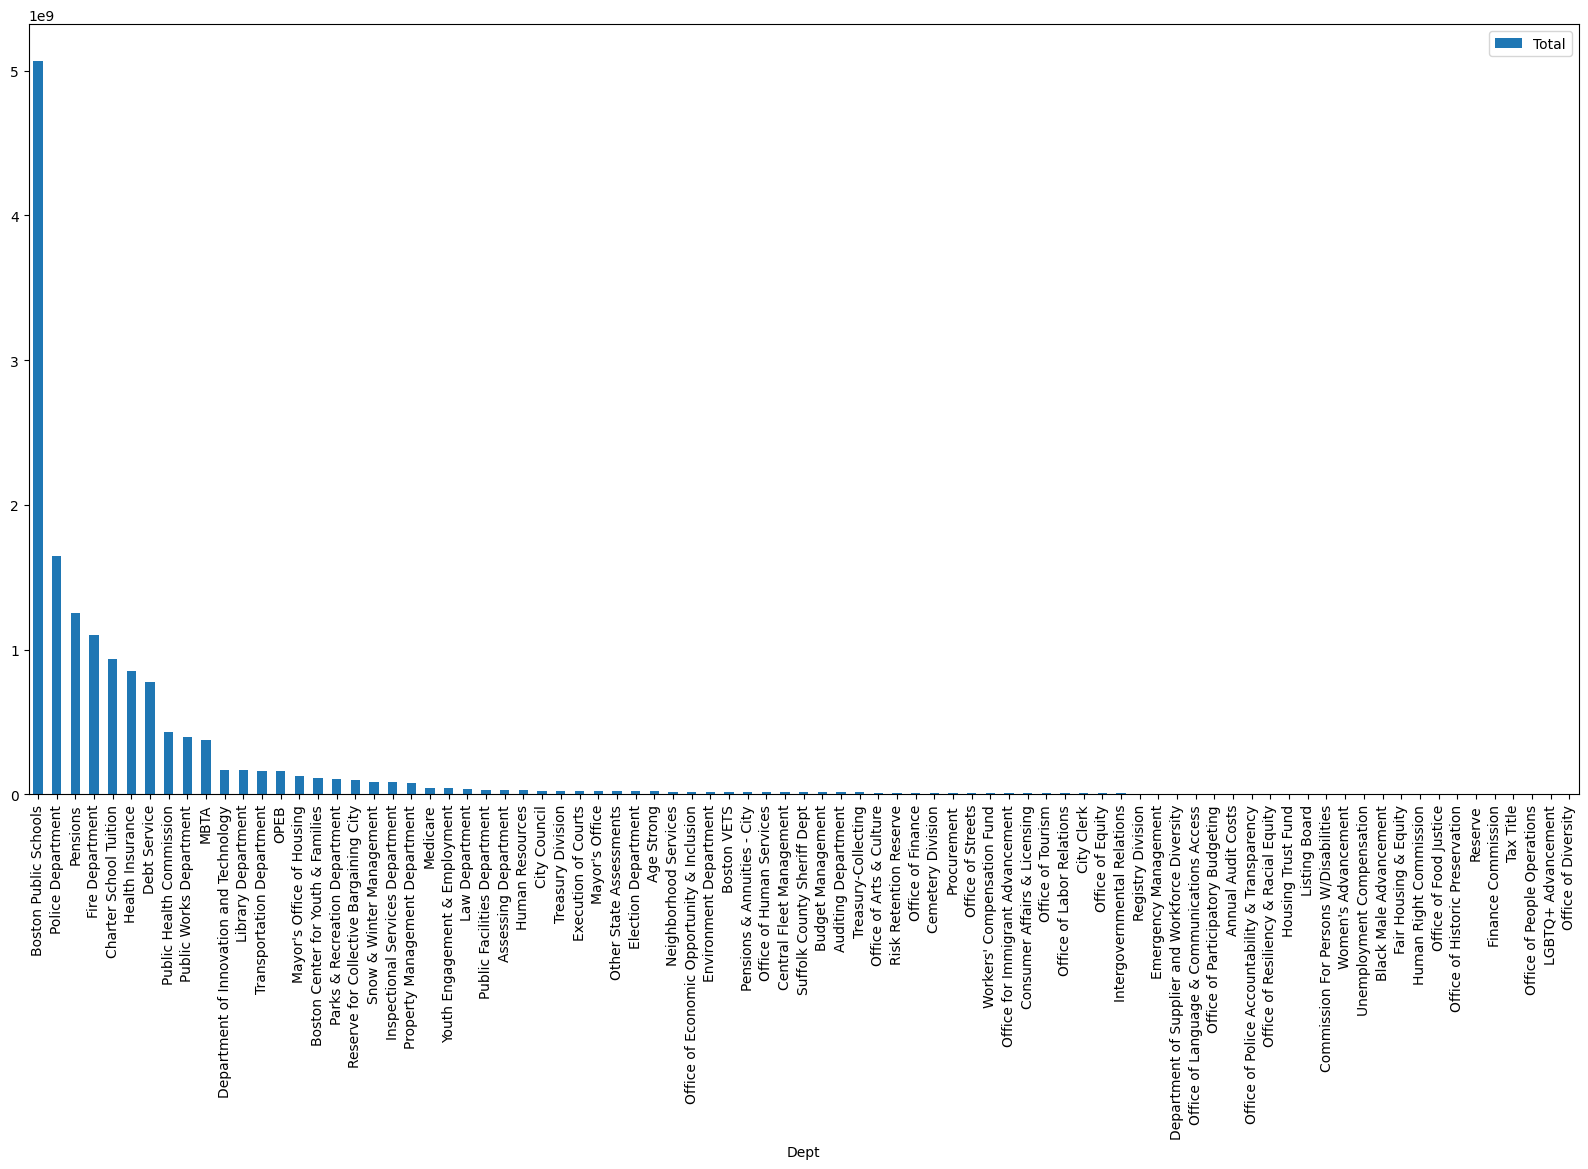

In [314]:
# create a bar chart with the dataframe
df_operating_budget_total.plot.bar(x='Dept', y='Total', rot=90, figsize=(20, 10))

This graph shows how much money is putting into education in Boston.

# Revenue Budget Analysis

In [411]:
# read revenue-budget.csv
df_revenue_budget = pd.read_csv('revenue-budget.csv')
# drop 8th column, since it is empty
df_revenue_budget = df_revenue_budget.drop(df_revenue_budget.columns[[8]], axis=1)
# drop NaN values
df_revenue_budget = df_revenue_budget.dropna()
# print column names
print(df_revenue_budget.columns)
df_revenue_budget

Index(['Revenue Category', 'Account', 'Cabinet', 'Department', ' FY20 Actual ',
       ' FY21 Actual ', ' FY22 Appropriation ', ' FY23 Adopted '],
      dtype='object')


,Revenue Category,Account,Cabinet,Department,FY20 Actual,FY21 Actual,FY22 Appropriation,FY23 Adopted
0,Property Tax Levy,Real Estate Taxes,Finance,Assessing Department,"2,330,854,196","2,490,082,613","2,627,868,238","2,743,564,944"
1,Property Tax Levy,Personal Property Tax,Finance,Assessing Department,"183,301,025","189,939,113","195,455,138","210,341,517"
2,Property Tax Levy,Property Tax Overlay,Finance,Assessing Department,"(47,323,895)","(3,735,387)","(33,174,590)","(10,000,000)"
3,Excises,Aircraft Fuel Excise,Finance,Treasury Department,"32,470,675","8,474,178","12,000,000","20,000,000"
4,Excises,Boat Excise,Finance,Assessing Department,"6,689",419,"40,000","40,000"
...,...,...,...,...,...,...,...,...
183,Available Funds,Approp. Cemetery Trust Fund,"Environment, Energy & Open Space",Parks & Recreation Department,-,-,"950,000","950,000"
184,Available Funds,Approp. Parking Meters,Streets,Transportation Department,-,"20,000,000","30,000,000","30,000,000"
185,Non-Recurring Revenue,American Rescue Plan,Finance,Auditing Department,-,-,"55,000,000","40,000,000"
186,Non-Recurring Revenue,Approp. Fund Balance,Finance,Auditing Department,-,"40,000,000","40,000,000","40,000,000"


In [412]:
# convert all columns after the 5th column to number, for example 400,000 to 400000, - to 0

for i in range(4, len(df_revenue_budget.columns)):
    df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
# now the unit is in thousands
# starts 5th column to the end, turn them into numbers
for i in range(4, len(df_revenue_budget.columns)):
    df_revenue_budget.iloc[:,i] = pd.to_numeric(df_revenue_budget.iloc[:,i])
df_revenue_budget

# add a new column 'Total' to the dataframe, Total = sum starts 5th column to the end
df_revenue_budget['Total'] = df_revenue_budget.iloc[:, 4:].sum(axis=1)
# create a dataframe with 'Revenue Category' row and 'Total' row
df_revenue_budget_total = df_revenue_budget[['Revenue Category', 'Total']]
# group by 'Revenue Category' and sum the 'Total' column
df_revenue_budget_total = df_revenue_budget_total.groupby('Revenue Category').sum()
# sort the dataframe by 'Total' column
df_revenue_budget_total = df_revenue_budget_total.sort_values(by='Total', ascending=False)
# reset the index
df_revenue_budget_total = df_revenue_budget_total.reset_index()
# print the total budget
print(df_revenue_budget_total['Total'].sum())
# add a new column 'Percentage' to the dataframe, Percentage = Total / Total budget
df_revenue_budget_total['Percentage'] = df_revenue_budget_total['Total'] / df_revenue_budget_total['Total'].sum()
# concatenate Total column with 'k'
df_revenue_budget_total['Total'] = df_revenue_budget_total['Total'].astype(str) + 'k'
# print the dataframe
df_revenue_budget_total

15064595.0


C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\3192449032.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\3192449032.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\3192449032.py:4: FutureWarning: The defaul

,Revenue Category,Total,Percentage
0,Property Tax Levy,11065636.0k,0.734546
1,State Aid,1908654.0k,0.126698
2,Excises,593472.0k,0.039395
3,Licenses & Permits,284039.0k,0.018855
4,Department Revenue,257967.0k,0.017124
5,Fines,229280.0k,0.015220
6,Non-Recurring Revenue,215000.0k,0.014272
7,Payments in Lieu of Taxes,208757.0k,0.013857
8,Urban Redev Chapter 121A,142581.0k,0.009465
9,Available Funds,81900.0k,0.005437


C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\2933839258.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\2933839258.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\2933839258.py:8: FutureWarning: The defaul

<AxesSubplot: xlabel='Revenue Category'>

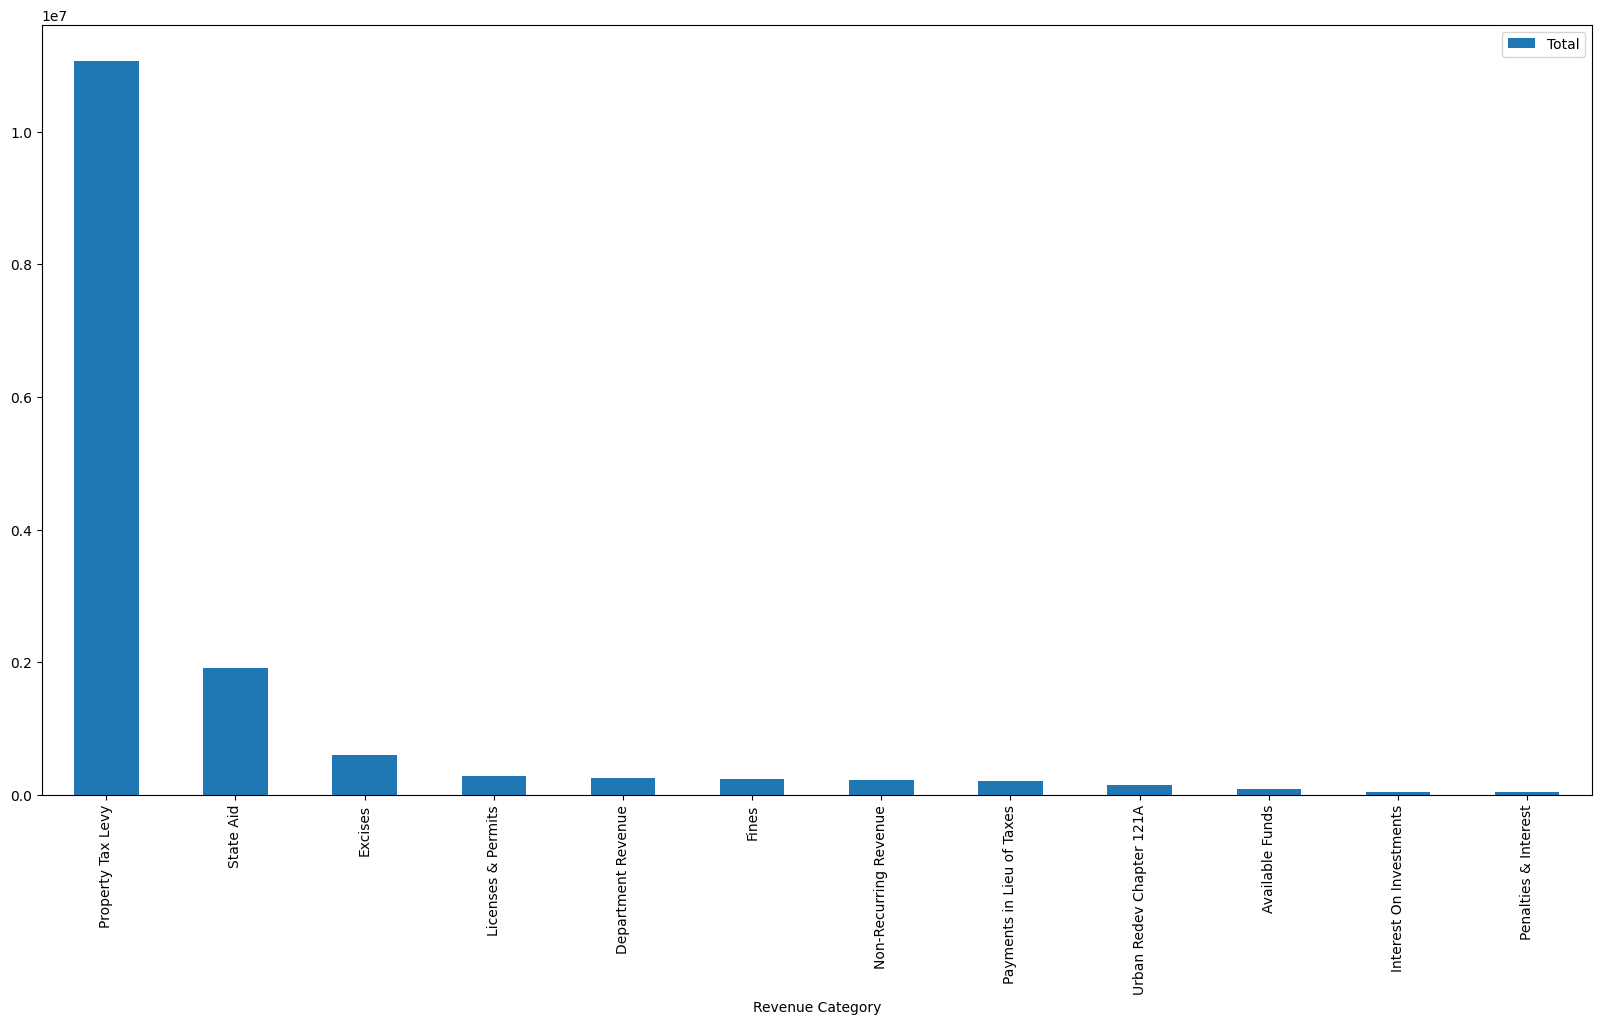

In [383]:
# read revenue-budget.csv
df_revenue_budget = pd.read_csv('revenue-budget.csv')
# drop 8th column, since it is empty
df_revenue_budget = df_revenue_budget.drop(df_revenue_budget.columns[[8]], axis=1)
# drop NaN values
df_revenue_budget = df_revenue_budget.dropna()
for i in range(4, len(df_revenue_budget.columns)):
    df_revenue_budget.iloc[:,i] = df_revenue_budget.iloc[:,i].str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace(' ', '').str.replace('-', '0').str.slice(stop=-3)
# now the unit is in thousands
# starts 5th column to the end, turn them into numbers
for i in range(4, len(df_revenue_budget.columns)):
    df_revenue_budget.iloc[:,i] = pd.to_numeric(df_revenue_budget.iloc[:,i])
# add a new column 'Total' to the dataframe, Total = sum starts 5th column to the end
df_revenue_budget['Total'] = df_revenue_budget.iloc[:, 4:].sum(axis=1)
# create a dataframe with 'Revenue Category' row and 'Total' row
df_revenue_budget_total = df_revenue_budget[['Revenue Category', 'Total']]
# group by 'Revenue Category' and sum the 'Total' column
df_revenue_budget_total = df_revenue_budget_total.groupby('Revenue Category').sum()
# sort the dataframe by 'Total' column
df_revenue_budget_total = df_revenue_budget_total.sort_values(by='Total', ascending=False)
# reset the index
df_revenue_budget_total = df_revenue_budget_total.reset_index()
# make a bar chart from df_revenue_budget_total
df_revenue_budget_total.plot.bar(x='Revenue Category', y='Total', rot=90, figsize=(20, 10))


It is unarguably property tax the most. That is a lot of old money in Boston..